# Constant Proportion Portfolio Insurance (CPPI)

This notebook presents the implementation of Constant Proportion Portfolio Insurance (CPPI) using monthly data of the S&P 500 (as the risky asset) and the US 10-Year Treasury Bond yield (as the safe asset). Key components include:

1- **Risky Asset (ra):** S&P 500 returns, serving as the primary investment vehicle subject to market fluctuations.

2- **Risk Free Asset (rf):*** US 10-Year Treasury Bond yield, providing the baseline for risk-free returns.

The CPPI strategy dynamically adjusts portfolio allocations between the risky asset and the risk-free rate, aiming to protect the portfolio from significant losses while capitalizing on market upswings.

Additionally, this notebook features an interactive Monte Carlo simulation for CPPI, offering users the opportunity to explore various scenarios and visualize the performance under different market conditions.

**Note:** I used monthly data from 1-2000 to 12-2023

## Read the Data

In [1]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import Asset_Management as am 

In [2]:
path = r'C:\Users\rahma\Asset Managemet\My data\United States 10-Year Bond Yield Historical Data.csv'
rf = pd.read_csv (path,header = 0 , index_col = 0 , parse_dates = True ).dropna()
rf.index = pd.to_datetime(rf.index, format = '%Y%m%').to_period('M')
rf= rf/100
rf.head()

,10y-Treasury Bond Yield
2000-01,0.06662
2000-02,0.06409
2000-03,0.06002
2000-04,0.06218
2000-05,0.06285


In [3]:
path = r'C:\Users\rahma\Asset Managemet\My data\S&P 500 Historical Data.csv'
ra = pd.read_csv (r'C:\\Users\rahma\\erk\\My data\ra.csv', 
                  header = 0 , index_col = 0 , parse_dates = True )
ra.index = pd.to_datetime(ra.index, format = '%Y%m%').to_period('M')
ra.head()

,S&P 500
2000-01,-0.0561
2000-02,-0.0207
2000-03,0.1044
2000-04,-0.0365
2000-05,-0.0259


## Implement CPPI

### 1- CPPI without drawdown constraint

In [4]:
cppi_without_drawdown = am.run_cppi(risky_r = ra  #risky_asset 
                   ,riskfree_rate= rf #safe_asset
                   ,floor = .8 #80%
                   , m = 3 #asset_muliplier
                   , start = 1000 #Start Value
                  )


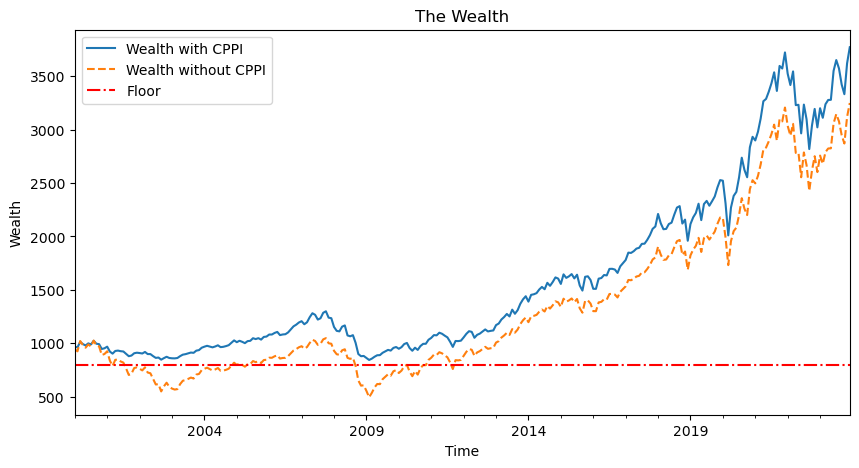

In [5]:
ax = cppi_without_drawdown['Wealth'].plot(figsize = (10,5),title = 'The Wealth')
cppi_without_drawdown["Risky Wealth"].plot(ax = ax, style = '--' ) 
cppi_without_drawdown["floor"].plot(ax = ax, color = 'r' ,style = '-.')
plt.legend(['Wealth with CPPI', 'Wealth without CPPI', 'Floor'])
plt.xlabel('Time')
plt.ylabel('Wealth')
plt.show()

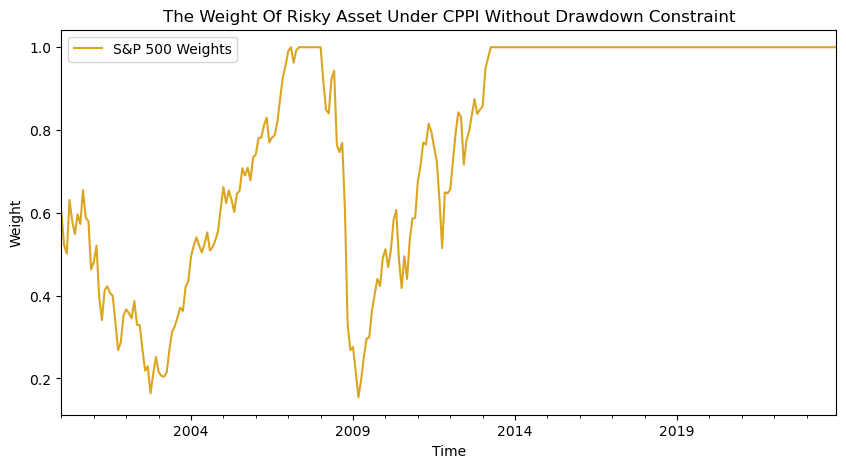

In [6]:
ra_weights_without_drawdown = cppi_without_drawdown["Risky Allocation"]
ra_weights_without_drawdown.plot(xlabel = 'Time' , ylabel = 'Weight',figsize = (10,5), title = 'The Weight Of Risky Asset Under CPPI Without Drawdown Constraint'
                ,color = 'goldenrod')
plt.legend(['S&P 500 Weights'])

In [7]:
wealth_without_drawdown= pd.DataFrame({'Wealth With CPPI':cppi_without_drawdown['Wealth'].to_numpy().reshape(-1) ,'Wealth Without CPPI':cppi_without_drawdown["Risky Wealth"].to_numpy().reshape(-1)}, index = ra.index)
print('The summary stats of Wealth:')
am.summary_stats(wealth_without_drawdown.pct_change().dropna(), riskfree_rate=0.041)

The summary stats of Wealth:


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Wealth With CPPI,0.058480,0.119628,-0.337941,4.780801,0.053358,0.079413,0.140630,-0.350743
Wealth Without CPPI,0.053035,0.155481,-0.464776,3.801513,0.073380,0.098360,0.074337,-0.527791


### 2- CPPI With Drawdown Constraint

In [8]:
cppi_with_drawdown = am.run_cppi(risky_r = ra  #risky_asset 
                   ,riskfree_rate= rf #safe_asset
                   ,floor = .8 #80%
                   , m = 3 #asset_muliplier
                   , start = 1000 #Start Value
                   , drawdown= .2 #maximum drawdons
                  )


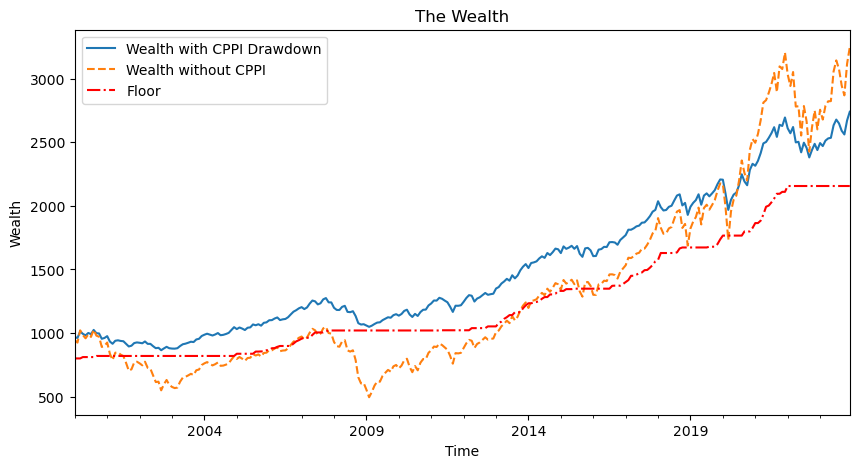

In [9]:
ax = cppi_with_drawdown['Wealth'].plot(figsize = (10,5),title = 'The Wealth')
cppi_with_drawdown["Risky Wealth"].plot(ax = ax, style = '--' ) 
cppi_with_drawdown["floor"].plot(ax = ax, color = 'r' ,style = '-.')
plt.legend(['Wealth with CPPI Drawdown', 'Wealth without CPPI', 'Floor'])
plt.xlabel('Time')
plt.ylabel('Wealth')
plt.show()

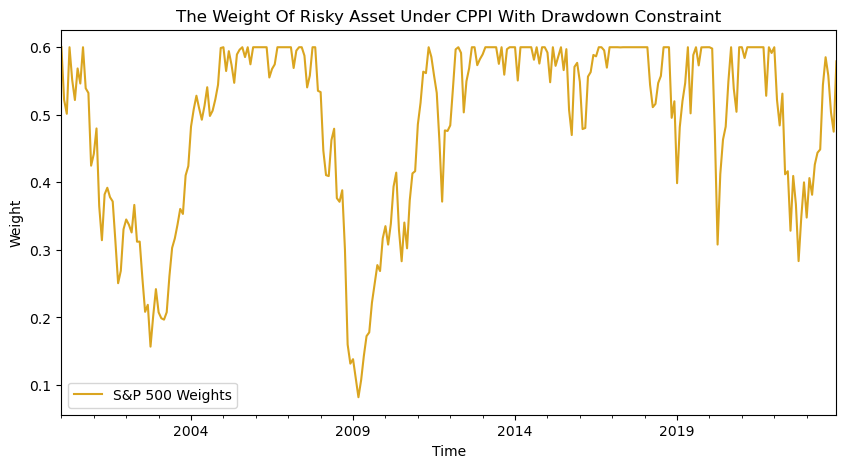

In [10]:
ra_weights_with_drawdown = cppi_with_drawdown["Risky Allocation"]
ra_weights_with_drawdown.plot(xlabel = 'Time' , ylabel = 'Weight',figsize = (10,5), title = 'The Weight Of Risky Asset Under CPPI With Drawdown Constraint'
                ,color = 'goldenrod')
plt.legend(['S&P 500 Weights'])

In [11]:
wealth_with_drawdown= pd.DataFrame({'Wealth With CPPI Drawdown':cppi_with_drawdown['Wealth'].to_numpy().reshape(-1) ,'Wealth Without CPPI':cppi_with_drawdown["Risky Wealth"].to_numpy().reshape(-1)}, index = ra.index)
print('The summary stats of Wealth:')
am.summary_stats(wealth_with_drawdown.pct_change().dropna(), riskfree_rate=0.041)

The summary stats of Wealth:


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Wealth With CPPI Drawdown,0.044451,0.067341,-0.503804,3.389115,0.030634,0.042045,0.049281,-0.177537
Wealth Without CPPI,0.053035,0.155481,-0.464776,3.801513,0.073380,0.098360,0.074337,-0.527791


# Monte Carlo Simulation of CPPI



In [12]:
import ipywidgets as widgets
from IPython.display import display


In [13]:
cppi_controls = widgets.interactive(am.show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                   mu = widgets.FloatSlider(min=0, max=.20, step=.01, value=am.annualize_rets(ra,12).iloc[0]),
                                   sigma=widgets.FloatSlider(min=0, max=.4, step=.01, value=am.annualize_vol(ra,12).iloc[0]),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=  widgets.FloatSlider(min=0, max=.2, step=.01, value=rf.mean().iloc[0]),
                                   steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12,
                                                          description="Rebals/Year"),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…